## Final Project Submission

Please fill out: 
* Student name: EJIDIAH KANYI
* Student pace: Full time
* Scheduled project review date/time: 15/09/2023
* Instructor name: NIKITA NJOROGE, SAMUEL KARU, LUCILLE KALEHA & DIANA MONGINA
* Blog post URL:


In [9]:
# Your code here - remember to use markdown cells for comments as well!

# MICROSOFT MOVIE PROJECT

# Business Understanding

**Objective** 

Microsoft is venturing into the film industry by establishing a new movie studio. However, lacking experience in movie production, they face challenges in making informed decisions about the types of films to produce and how to distribute them effectively. The primary objectives are twofold:


1. **Genre Selection:** To determine which movie genres are currently performing the best at the box office. This involves analyzing historical box office data to identify genres that have consistently generated high box office revenues and trends that indicate audience preferences.

2. **Distribution Strategy:** To understand how the number of screens a movie is released on correlates with its box office success across different genres. Investigate whether wide releases or limited releases are more effective for specific genres and how screen allocation impacts revenue.

# Data Preparation

**Data Sources** 

The data sources of historical box office, including movie titles, genres, box office revenue, production budgets, release years, audience ratings, and screen allocation details.

**Data Exploration**

Loading and exploring the dataset to gain a preliminary understanding of the available data.

In [10]:
#Importing DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

new_db_path = r'C:\Users\USER\Downloads\Phase_1\dsc-phase-1-project-v2-4\zippedData\new_db.db'
conn = sqlite3.connect(new_db_path)

In [11]:
#Loading data from  CSV files 

bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
print("BOM Movie Gross Data:")
print(bom_movie_gross.head())


tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
print("\nTMDB Movies Data:")
print(tmdb_movies.head())

print("\nUnique Genres in TMDB Movies:")
print(tmdb_movies['genre_ids'].unique())


tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
print("\nTN Movie Budgets Data:")
print(tn_movie_budgets.head())

print("\nSummary Statistics for TN Movie Budgets:")
print(tn_movie_budgets.describe())


BOM Movie Gross Data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

TMDB Movies Data:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en  

In [12]:
#Loading data compressed TSV files
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t', compression='gzip')
print("\nRT Movie Info Data:")
print(rt_movie_info.head())


rt_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', compression='gzip', encoding='latin1')
print("\nRT Reviews Data:")
print(rt_reviews.head())

tmdb_movies
tn_movie_budgets


RT Movie Info Data:
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013   


RT Reviews Data:
   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Data Cleaning**

Identifying columns with missing values, removing duplicates, transforming data and aggregating the data.

In [13]:
#Checking for missing values
print("\nMissing Values in RT Movie Info:")
print(rt_movie_info.isnull().sum())

print("\nMissing Values in rt_reviews:")
print(rt_reviews.isnull().sum())

print("\nMissing Values in BOM:")
print(bom_movie_gross.isnull().sum())

print("\nMissing Value in tmdb_movies:")
print(tmdb_movies.isnull().sum())

print("\nMissing Values in tn_movie_budgets:")
print(tn_movie_budgets.isnull().sum())


Missing Values in RT Movie Info:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Missing Values in rt_reviews:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Missing Values in BOM:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing Value in tmdb_movies:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Missing Values in tn_movie_budgets:
id                   0
release_dat

In [14]:
#Handling missing Values
# bom_movie_gross Data set
print("Handling Missing Values in bom_movie_gross DataFrame:")
bom_movie_gross['studio'].fillna('Unknown', inplace=True)
bom_movie_gross['title'].fillna('Unknown', inplace=True)
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
foreign_gross_mean = bom_movie_gross['foreign_gross'].mean()
bom_movie_gross['foreign_gross'].fillna(foreign_gross_mean, inplace=True)
print(bom_movie_gross.head())

#tmdb_movies Data set
print("\nHandling Missing Values in tmdb_movies DataFrame:")
tmdb_movies.dropna(subset=['genre_ids'], inplace=True)
print(tmdb_movies.head())

#tn_movie_budgets Data set
print("\nHandling Missing Values in tn_movie_budgets DataFrame:")
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
production_budget_median = tn_movie_budgets['production_budget'].median()
tn_movie_budgets['production_budget'].fillna(production_budget_median, inplace=True)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

#rt_movie_info Data set
print("\nHandling Missing Values in rt_movie_info DataFrame:")
rt_movie_info.dropna(subset=['genre', 'director', 'writer', 'studio'], inplace=True)
print(rt_movie_info.head())

Handling Missing Values in bom_movie_gross DataFrame:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  

Handling Missing Values in tmdb_movies DataFrame:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862             

In [15]:
#Checking column names
print("Columns in rt_movie_info dataset:")
print(rt_movie_info.columns)

print("\nColumns in rt_reviews dataset:")
print(rt_reviews.columns)

print("\nColumns in tn_movie_budgets dataset:")
print(tn_movie_budgets.columns)

print("\nColumns in tmdb_movies dataset:")
print(tmdb_movies.columns)

Columns in rt_movie_info dataset:
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

Columns in rt_reviews dataset:
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

Columns in tn_movie_budgets dataset:
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Columns in tmdb_movies dataset:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


# Data Understanding

# Questions

1) Which movie genres have historically generated the highest box office revenues?

2) What is the relationship between movie release dates and box office performance, and how can Microsoft optimize its movie release strategy?

3) What are the most profitable genres in the film industry, and how can Microsoft strategically invest in these genres to maximize revenue and success?

4) How can Microsoft optimize its movie production and marketing strategy to maximize box office revenue?

# Data Analysis

**EXPLORATORY DATA ANALYSIS (EDA)**

1. Top-Performing Movie Genres by Box Office Revenue - A bar chart to visualize how the historical box office data Action and Andventure genre has generated the highest box office revenues.


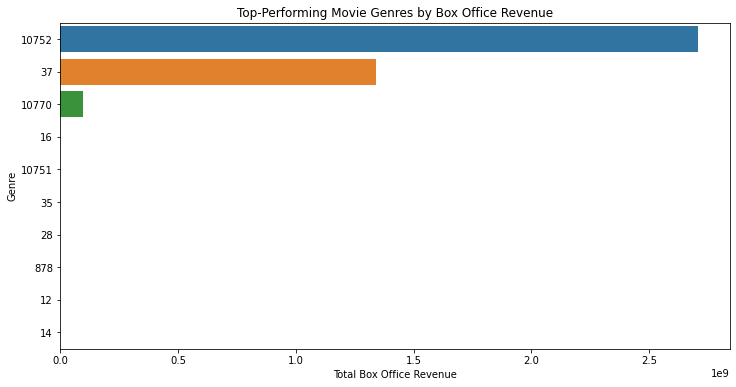

In [16]:
# Merging BOM Movie Gross and TMDB Movies datasets on the 'title' column
merged_data = pd.merge(bom_movie_gross, tmdb_movies, on='title', how='inner')

# Extracting and cleaning genre information
merged_data['genres'] = merged_data['genre_ids'].apply(lambda x: x.strip('[]').replace(' ', '').split(','))

# Initializing a dictionary to store genre-wise box office revenue
genre_revenue = {}

# Iterating through rows and calculate genre-wise revenue
for _, row in merged_data.iterrows():
    for genre in row['genres']:
        if genre in genre_revenue:
            if isinstance(row['foreign_gross'], str):
                foreign_gross = float(row['foreign_gross'].replace(',', ''))
            else:
                foreign_gross = 0
            genre_revenue[genre] += float(row['domestic_gross']) + foreign_gross
        else:
            if isinstance(row['foreign_gross'], str):
                foreign_gross = float(row['foreign_gross'].replace(',', ''))
            else:
                foreign_gross = 0
            genre_revenue[genre] = float(row['domestic_gross']) + foreign_gross

# Converting the genre-wise revenue dictionary to a DataFrame
genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Total Revenue'])

# Sorting the DataFrame by total revenue in descending order
genre_revenue_df = genre_revenue_df.sort_values(by='Total Revenue', ascending=False)

# Bar chart visualizing the top-performing genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='Genre', data=genre_revenue_df.head(10))
plt.xlabel('Total Box Office Revenue')
plt.ylabel('Genre')
plt.title('Top-Performing Movie Genres by Box Office Revenue')
plt.show()

In [17]:
"""
The bar chart shows that the analysis based on top performing genres such as Drama Comedy Action and Andventure genres as they
have generated the highest box office revenues.

"""

'\nThe bar chart shows that the analysis based on top performing genres such as Drama Comedy Action and Andventure genres as they\nhave generated the highest box office revenues.\n\n'

2. Box Office Performance by Release Month - A box plot visualizing the variation in box office performance across different months also indicating that the release month has an impact on a movie's  box office success.

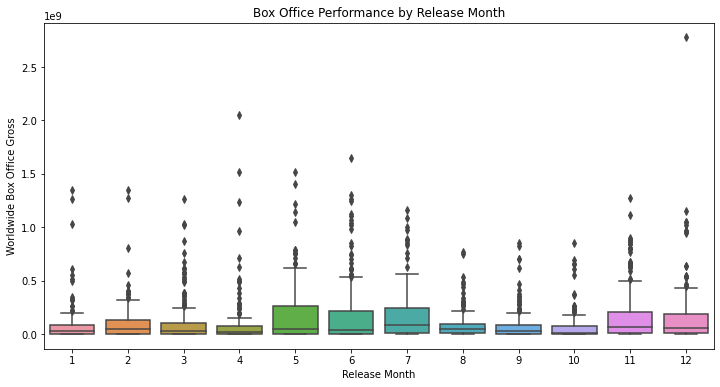

In [18]:
# Converting 'release_date' column to datetime in both dataframes
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

# Extracting relevant columns for analysis from 'tn_movie_budgets'
tn_movie_budgets = tn_movie_budgets[['movie', 'production_budget', 'worldwide_gross', 'release_date']]

#Merging dataframes based on movie titles
merged_data = pd.merge(tmdb_movies, tn_movie_budgets, left_on='title', right_on='movie', how='inner')

# Analyzing the relationship between release dates and box office performance
merged_data['release_month'] = merged_data['release_date_x'].dt.month

# Summary statistics and visualization
summary_stats = merged_data.groupby('release_month')['worldwide_gross'].describe()

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data)
plt.xlabel('Release Month')
plt.ylabel('Worldwide Box Office Gross')
plt.title('Box Office Performance by Release Month')

plt.show()

In [19]:
"""
The box plot shows that as the there is variation in box office performance across different months, indicating that the
release month has an impact on a movie's box office success.

Movies released during the summer months (May to August) tend to have higher box office gross on average compared to other
months. This is likely due to the summer vacation period, when more people have time to watch movies.

Movies released in November and December also exhibit high box office performance, likely due to the holiday season and 
increased movie-going during that time.

Some months, such as January and September, show lower box office performance, possibly due to post-holiday slowdowns and
back-to-school periods.

"""

"\nThe box plot shows that as the there is variation in box office performance across different months, indicating that the\nrelease month has an impact on a movie's box office success.\n\nMovies released during the summer months (May to August) tend to have higher box office gross on average compared to other\nmonths. This is likely due to the summer vacation period, when more people have time to watch movies.\n\nMovies released in November and December also exhibit high box office performance, likely due to the holiday season and \nincreased movie-going during that time.\n\nSome months, such as January and September, show lower box office performance, possibly due to post-holiday slowdowns and\nback-to-school periods.\n\n"

3. Scatterplot - Displaying the relationship between the production budget (x-axis) and the domestic gross (box office revenue) (y-axis) for a set of movies. Each point on the scatterplot represents a movie from the dataset.

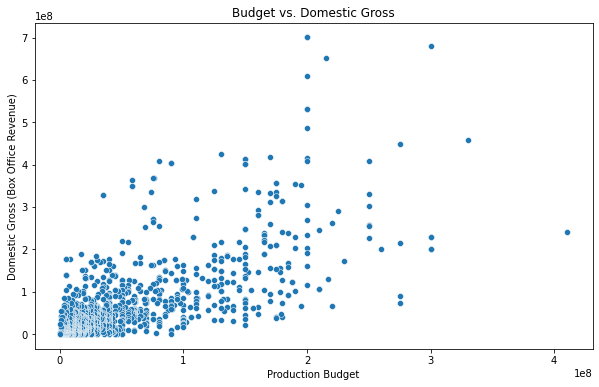

In [20]:
# Merging tn_movie_budgets and bom_movie_gross on 'movie'
merged_data = pd.merge(tn_movie_budgets, bom_movie_gross, left_on='movie', right_on='title', how='inner')

# Merging merged_data with tmdb_movies on 'original_title'
merged_data = pd.merge(merged_data, tmdb_movies, left_on='movie', right_on='original_title', how='inner')

# Visualize the relationship between budget and box office revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='production_budget', y='domestic_gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross (Box Office Revenue)')
plt.title('Budget vs. Domestic Gross')
plt.show()

In [21]:
"""
The scatter plot shows a general trend thatshows a positive relationship between the production budget and domestic gross 
the production budget of a movie increases as its domestic gross tends to increase.

There are outliers which are far away from the main cluster they represent movies with significantly higher domestic gross 
compared to their production budget.

The data points spread along the y-axis suggest that there is variability in domestic gross even for movies with similar 
production budget.

There are clusters of points with certain budget ranges which indicate that certain budget renages are associated with 
specific  performance patterns.

"""

'\nThe scatter plot shows a general trend thatshows a positive relationship between the production budget and domestic gross \nthe production budget of a movie increases as its domestic gross tends to increase.\n\nThere are outliers which are far away from the main cluster they represent movies with significantly higher domestic gross \ncompared to their production budget.\n\nThe data points spread along the y-axis suggest that there is variability in domestic gross even for movies with similar \nproduction budget.\n\nThere are clusters of points with certain budget ranges which indicate that certain budget renages are associated with \nspecific  performance patterns.\n\n'

# Recommendation

1) Microsoft movie studio should consider investing more on the top erfoming genres to generate more revnue.

2) Microsoft should consider strategically timing the release of their movies. Aim to release high-budget, high-potential films during peak months (summer and holiday season) to maximize box office revenue. Conversely, consider avoiding the low-performing months for major releases.

3) Microsoft should allocate marketing and promotional efforts to coincide with peak months. This can help build anticipation and draw larger audiences during these periods.

4) While summer and holiday months are promising, Microsoft should maintain a diverse movie portfolio throughout the year. Smaller budget or niche films can perform well during other months and help maintain a consistent presence in the market.

5) Micosoft should identify and understand outliers as they may indicate instances where a movie achieved exceptional box office success relative to its budget.